# DeepGaze IIE

In [12]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)


# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)
image = face()

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/../../pretrained_weights/deepgaze/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('../../pretrained_weights/deepgaze/centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
print(image_tensor.shape, torch.min(image_tensor), torch.max(image_tensor))
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

Using cache found in /mnt/homes/minghao/.cache/torch/hub/pytorch_vision_v0.6.0
/tmp/ipykernel_3958231/2055201993.py:20: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = face()


torch.Size([1, 3, 768, 1024]) tensor(0, device='cuda:0', dtype=torch.uint8) tensor(255, device='cuda:0', dtype=torch.uint8)


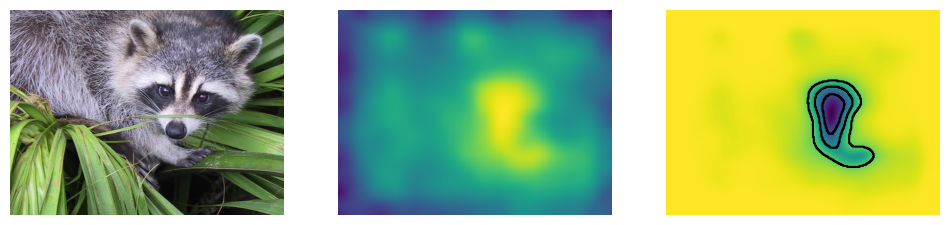

In [2]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()

# DeepGaze III

Using cache found in /mnt/homes/minghao/.cache/torch/hub/pytorch_vision_v0.6.0
/mnt/homes/minghao/anaconda3/envs/lavis/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/homes/minghao/anaconda3/envs/lavis/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/tmp/ipykernel_3958231/2988869923.py:15: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = face()


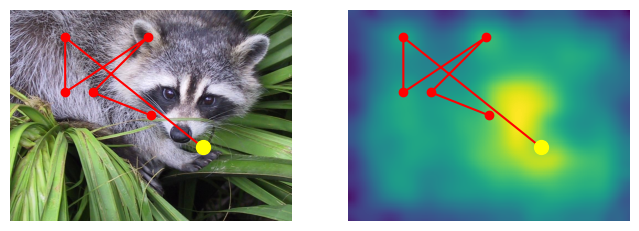

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

image = face()

# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/../../pretrained_weights/deepgaze/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('../../pretrained_weights/deepgaze/centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

In [4]:
from pysaliency.models import sample_from_logdensity

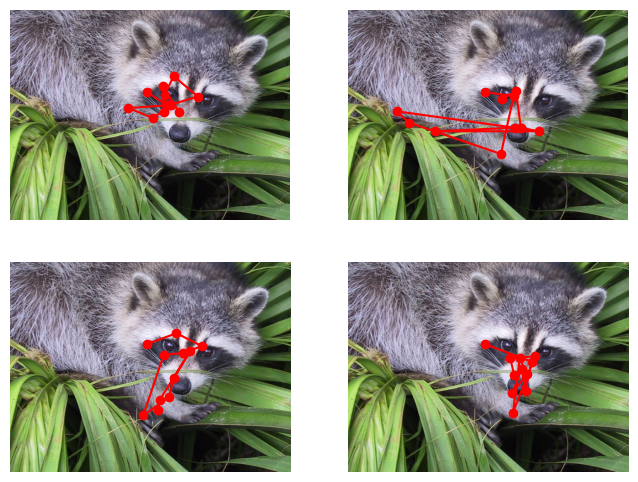

In [5]:
def get_fixation_history(fixation_coordinates, model):
    history = []
    for index in model.included_fixations:
        try:
            history.append(fixation_coordinates[index])
        except IndexError:
            history.append(np.nan)
    return history


f, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

rst = np.random.RandomState(seed=23)

for ax in axs.flatten():
    fixations_x = [500]
    fixations_y = [300]

    for i in range(10):
        x_hist = get_fixation_history(fixations_x, model)
        y_hist = get_fixation_history(fixations_y, model)

        
        x_hist_tensor = torch.tensor([x_hist]).to(DEVICE)
        y_hist_tensor = torch.tensor([y_hist]).to(DEVICE)
        log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)
        logD = log_density_prediction.detach().cpu().numpy()[0, 0]
        next_x, next_y = sample_from_logdensity(logD, rst=rst)

        fixations_x.append(next_x)
        fixations_y.append(next_y)

    ax.imshow(image)
    ax.plot(fixations_x, fixations_y, 'o-', color='red')
    ax.set_axis_off()

In [6]:
from typing import Optional, Tuple, List, Dict, Any, Union, Sequence
import pysaliency



class MySaliencyMapModel(pysaliency.SaliencyMapModel):
    
    def __init__(self, model_path, block_num=7, dst_w=720):
        super().__init__()
        self.model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)
        self.block_num = block_num
        self.dst_w = dst_w
        
    def _saliency_map(self, stimulus, text_description:Optional[str]=None):
        image = stimulus
        print(image.shape, image.dtype, np.min(image), np.max(image))
        plt.imshow(image)
        plt.show()
        
        image = face()
        print(image.shape, image.dtype, np.min(image), np.max(image))
        plt.imshow(image)
        plt.show()
        
        # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
        fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
        fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

        # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
        # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/../../pretrained_weights/deepgaze/centerbias_mit1003.npy
        # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
        centerbias_template = np.load('../../deepgaze/../../pretrained_weights/deepgaze/centerbias_mit1003.npy')
        # rescale to match image size
        centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
        # renormalize log density
        centerbias -= logsumexp(centerbias)

        image_tensor = torch.tensozr([image.transpose(2, 0, 1)]).to(DEVICE)
        centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
        x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
        y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

        log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

        f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
        axs[0].imshow(image)
        axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
        axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
        axs[0].set_axis_off()
        axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
        axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
        axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
        axs[1].set_axis_off()


(768, 1024) 39.539700355813196 377.41799926454405 243.32194103226882 73.61208409011512 float64


100%|██████████| 10/10 [00:02<00:00,  4.65it/s]


AUC wrt. shuffled nonfixations: 0.65


100%|██████████| 10/10 [00:00<00:00, 4184.68it/s]


AUC wrt. uniform nonfixations: 0.76


100%|██████████| 10/10 [00:00<00:00, 9825.03it/s]

AUC wrt. identical nonfixations: 0.50
Fixation based KL-divergence wrt. uniform nonfixations: 0.44


Fixation based KL-divergence wrt. shuffled nonfixations: 0.14
Fixation based KL-divergence wrt. identical nonfixations: 0.00
Image based KL-divergence: 1.7924752398349553 bit


0.0

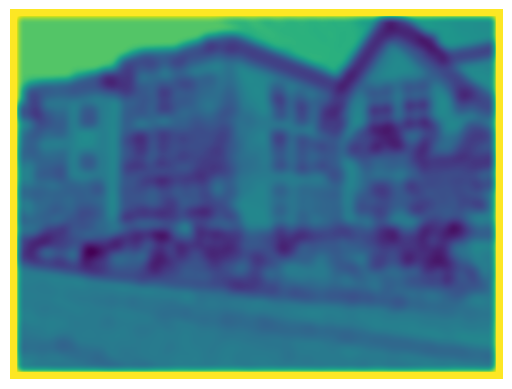

In [7]:
import sys
import pysaliency
from pysaliency.external_datasets.sjtuvis import TextDescriptor
import os

data_location = 'test_datasets'
data_location = "../../datasets"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_mit1003(location=data_location)
cutoff = 10
short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
short_fixations = mit_fixations[mit_fixations.n < cutoff]
aim = pysaliency.AIM(location='../../models', cache_location=os.path.join('model_caches', 'AIM'))
smap = aim.saliency_map(mit_stimuli[10])
print(smap.shape, np.min(smap), np.max(smap), np.mean(smap), np.std(smap), smap.dtype) 
plt.imshow(-smap)
plt.axis('off');
aim.AUC(short_stimuli, short_fixations, nonfixations='uniform', verbose=True)
print('AUC wrt. shuffled nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations='shuffled')))
aim.AUC(short_stimuli, short_fixations, nonfixations='shuffled', verbose=True)
print('AUC wrt. uniform nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations='uniform')))
aim.AUC(short_stimuli, short_fixations, nonfixations=short_fixations, verbose=True)
print('AUC wrt. identical nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations=short_fixations)))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='uniform')
print('Fixation based KL-divergence wrt. uniform nonfixations: {:.02f}'.format(perf))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='shuffled')
print('Fixation based KL-divergence wrt. shuffled nonfixations: {:.02f}'.format(perf))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations=short_fixations)
print('Fixation based KL-divergence wrt. identical nonfixations: {:.02f}'.format(perf))
gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
perf = aim.image_based_kl_divergence(short_stimuli, gold_standard)
print("Image based KL-divergence: {} bit".format(perf / np.log(2)))
gold_standard.image_based_kl_divergence(short_stimuli, gold_standard, minimum_value=1e-20)

In [8]:
import sys
import pysaliency
from pysaliency.external_datasets.sjtuvis import TextDescriptor
import os

data_location = 'test_datasets'
data_location = "../../datasets"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis(location=data_location)
cutoff = 10
short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
short_fixations = mit_fixations[mit_fixations.n < cutoff]
aim = pysaliency.AIM(location='../../models', cache_location=os.path.join('model_caches', 'AIM'))
smap = aim.saliency_map(mit_stimuli[10])
print(smap.shape, np.min(smap), np.max(smap), np.mean(smap), np.std(smap), smap.dtype) 
plt.imshow(-smap)
plt.axis('off');
aim.AUC(short_stimuli, short_fixations, nonfixations='uniform', verbose=True)
print('AUC wrt. shuffled nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations='shuffled')))
aim.AUC(short_stimuli, short_fixations, nonfixations='shuffled', verbose=True)
print('AUC wrt. uniform nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations='uniform')))
aim.AUC(short_stimuli, short_fixations, nonfixations=short_fixations, verbose=True)
print('AUC wrt. identical nonfixations: {:.02f}'.format(aim.AUC(short_stimuli, short_fixations, nonfixations=short_fixations)))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='uniform')
print('Fixation based KL-divergence wrt. uniform nonfixations: {:.02f}'.format(perf))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='shuffled')
print('Fixation based KL-divergence wrt. shuffled nonfixations: {:.02f}'.format(perf))
perf = aim.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations=short_fixations)
print('Fixation based KL-divergence wrt. identical nonfixations: {:.02f}'.format(perf))
gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
perf = aim.image_based_kl_divergence(short_stimuli, gold_standard)
print("Image based KL-divergence: {} bit".format(perf / np.log(2)))
gold_standard.image_based_kl_divergence(short_stimuli, gold_standard, minimum_value=1e-20)

TypeError: get_sjtu_vis() missing 1 required positional argument: 'text_descriptor'